In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df['target'] = iris.target

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [16]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

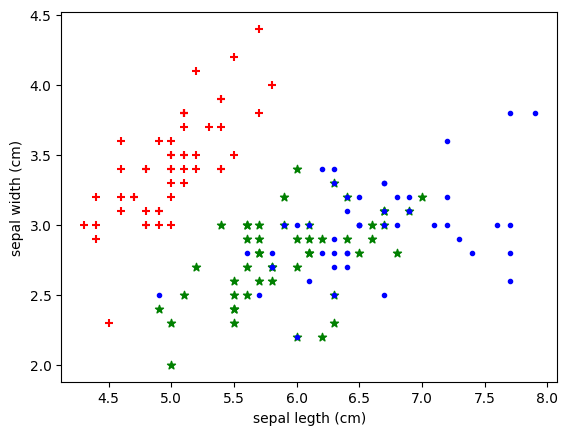

In [22]:
plt.xlabel('sepal legth (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', marker='*')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', marker='.')

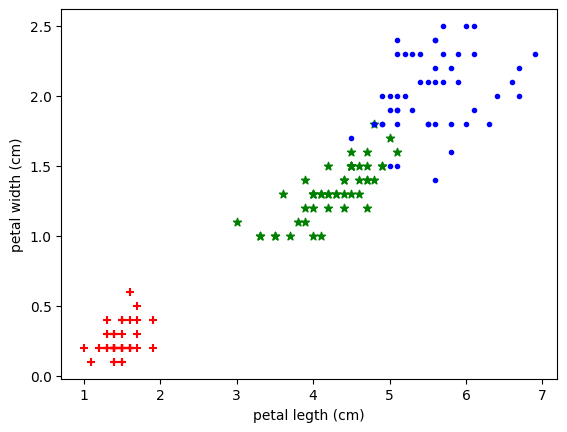

In [23]:
plt.xlabel('petal legth (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', marker='*')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', marker='.')

In [24]:
x = df.drop(['target', 'flower_name'], axis=1)
y = df['target']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [54]:
from sklearn.svm import SVC

model = SVC(gamma=1,kernel='linear')

In [55]:
model.fit(x_train, y_train)

SVC(gamma=1, kernel='linear')

In [56]:
y_pred = model.predict(x_test)

In [57]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)

1.0